# STC TV

In [1]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# stc Tv dataset
The dataset includes total watching hours for customers per day. 

You are required to work on predecting the forecast for the watching hours.

In [2]:
dataframe = pd.read_excel("stc TV Data Set_T2.xlsb",index_col=0)
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()

In [3]:
# check the data shape
dataframe.shape

(86, 2)

In [4]:
# display the first 5 rows 
dataframe.head()

date_  Total_watch_time_in_houres
0 2018-01-01                 1123.551944
1 2018-01-02                 1000.129722
2 2018-01-03                  881.924444
3 2018-01-04                  782.669444
4 2018-01-05                 1051.939444

In [5]:
# display the dataset after applying data types
dataframe[['Total_watch_time_in_houres']] = dataframe[['Total_watch_time_in_houres']].apply(pd.to_numeric)  # read numeric columns as numeric data types
dataframe['date_'] = pd.to_datetime(dataframe['date_'])  # read date column as date data type
dataframe.head()


date_  Total_watch_time_in_houres
0 2018-01-01                 1123.551944
1 2018-01-02                 1000.129722
2 2018-01-03                  881.924444
3 2018-01-04                  782.669444
4 2018-01-05                 1051.939444

In [6]:
# describe the numeric values in the dataset
dataframe.describe()

Total_watch_time_in_houres
count                   86.000000
mean                   780.817926
std                    122.992002
min                    562.124722
25%                    707.709653
50%                    763.181389
75%                    840.985278
max                   1123.551944

In [7]:
# check if any column has null value in the dataset
dataframe.isnull().any()

date_                         False
Total_watch_time_in_houres    False
dtype: bool

In [8]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [9]:
# Setting the date as index
dataframe.set_index('date_', inplace=True)

In [10]:
# Display the dataframe after setting the date as index
dataframe.head()

Total_watch_time_in_houres
date_                                 
2018-01-01                 1123.551944
2018-01-02                 1000.129722
2018-01-03                  881.924444
2018-01-04                  782.669444
2018-01-05                 1051.939444

In [11]:
# show the dataframe
fig = px.line(dataframe,  y="Total_watch_time_in_houres")
fig.show()

In [12]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


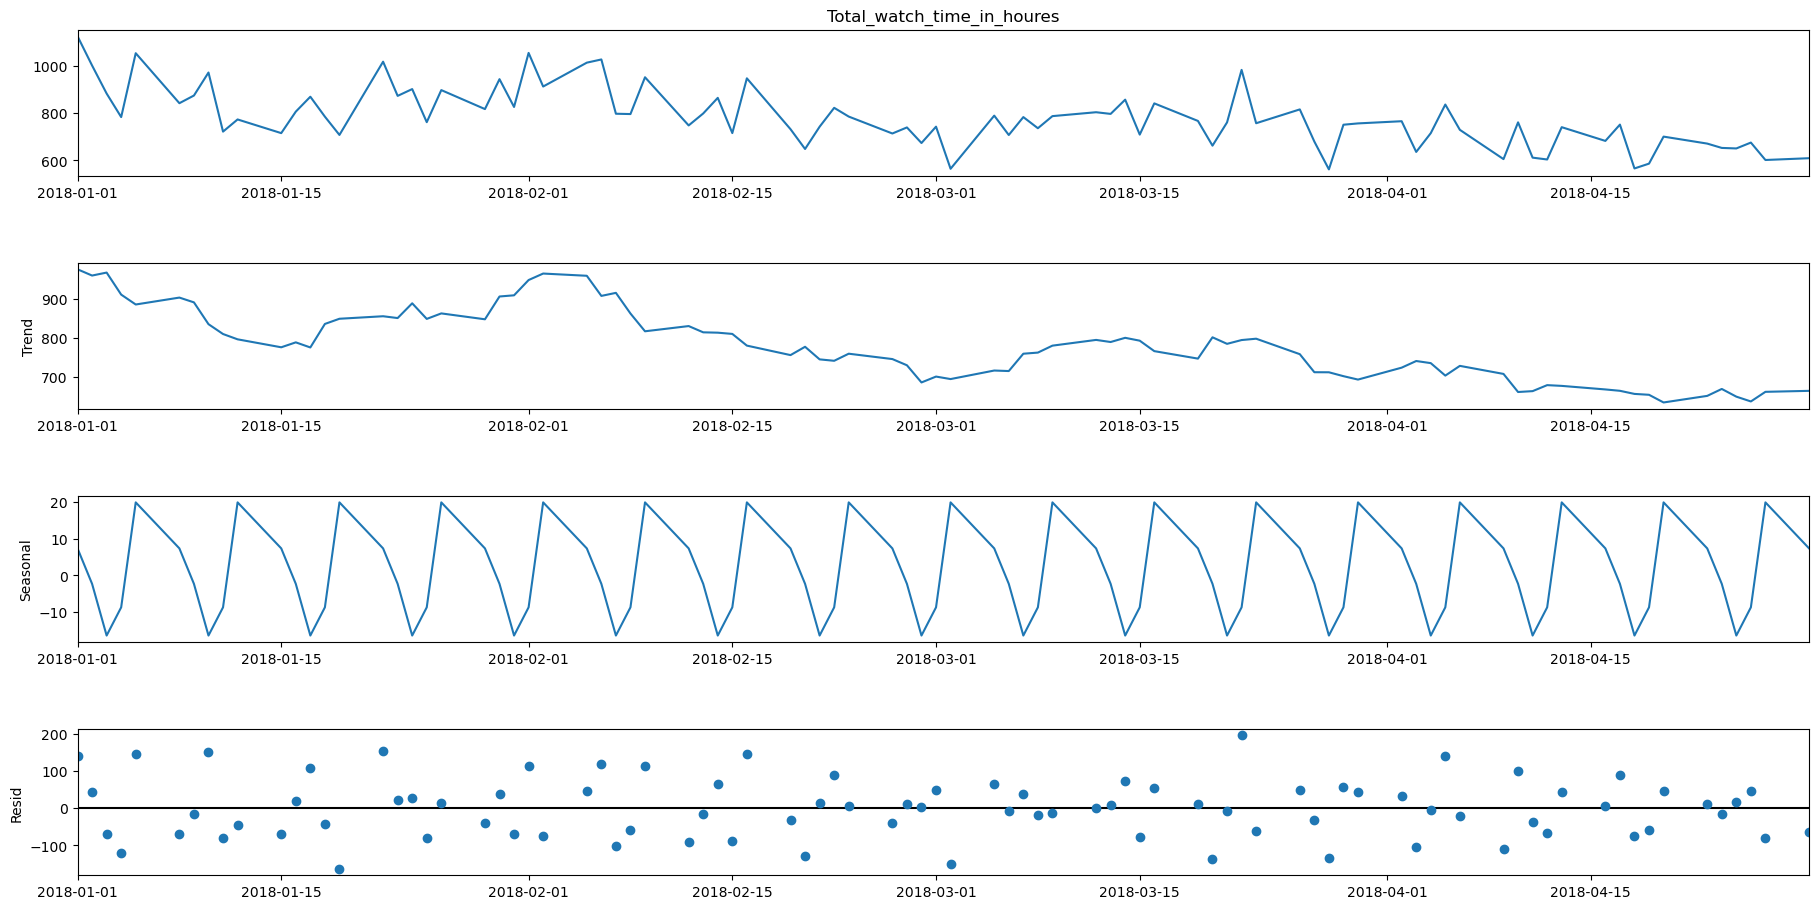

In [13]:
y = dataframe["Total_watch_time_in_houres"]

#decompose data
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(20,10)
    plt.show()

seasonal_decompose(y)


In [ ]:
"""
TODO using the previous dataset (df) build a prediction model to predict the expected watch time for the next two months
Hint: you can build a forecast model to predict the results
"""

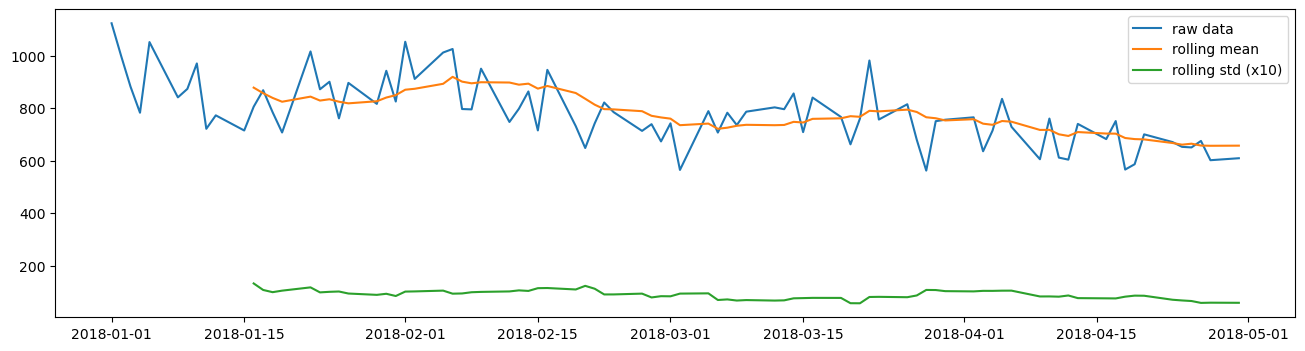

In [14]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

In [15]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

ADF_test(y,'raw data')
       

 > Is the raw data stationary ?
Test statistic = -1.728
P-value = 0.417
Critical values :
	1%: -3.512738056978279 - The data is not stationary with 99% confidence
	5%: -2.8974898650628984 - The data is not stationary with 95% confidence
	10%: -2.585948732897085 - The data is not stationary with 90% confidence


 > Is the de-trended data stationary ?
Test statistic = -7.963
P-value = 0.000
Critical values :
	1%: -3.5219803175527606 - The data is  stationary with 99% confidence
	5%: -2.9014701097664504 - The data is  stationary with 95% confidence
	10%: -2.58807215485756 - The data is  stationary with 90% confidence


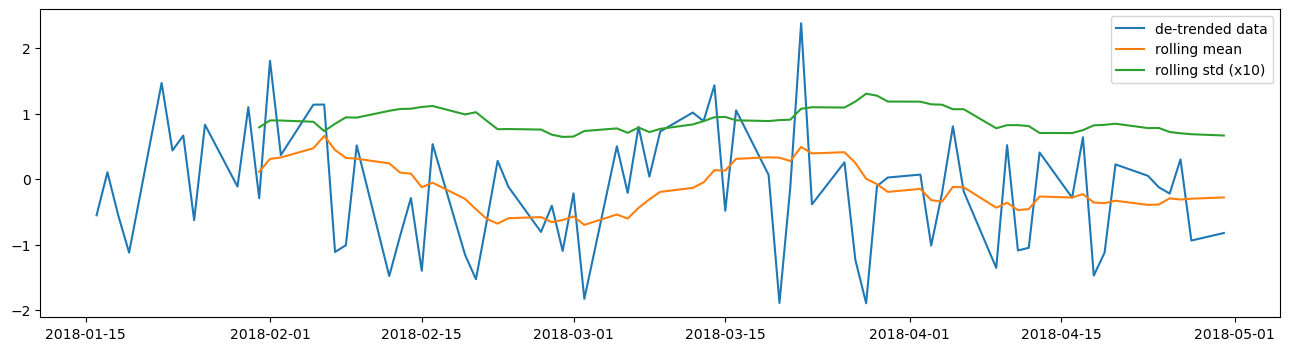

In [16]:
# Detrending
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

 > Is the 12 lag differenced data stationary ?
Test statistic = -4.836
P-value = 0.000
Critical values :
	1%: -3.540522678829176 - The data is  stationary with 99% confidence
	5%: -2.9094272025108254 - The data is  stationary with 95% confidence
	10%: -2.5923136524453696 - The data is  stationary with 90% confidence


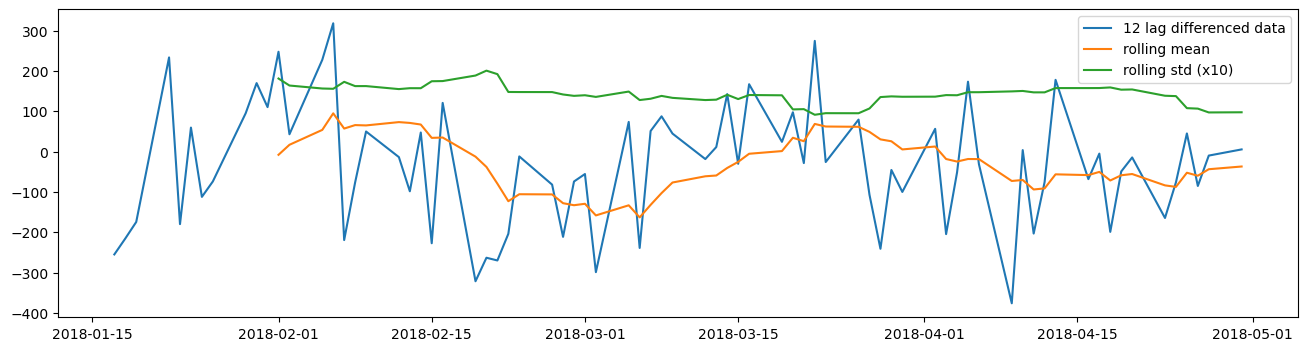

In [17]:
# Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -4.336
P-value = 0.000
Critical values :
	1%: -3.5656240522121956 - The data is  stationary with 99% confidence
	5%: -2.920142229157715 - The data is  stationary with 95% confidence
	10%: -2.598014675124952 - The data is  stationary with 90% confidence


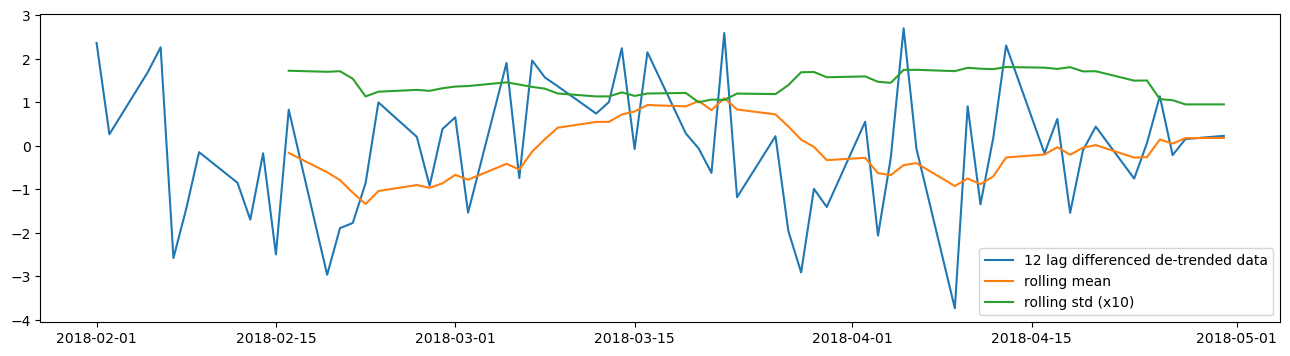

In [18]:
# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

In [22]:
y_to_train = y[:'2018-03-30'] # dataset to train
y_to_val = y['2018-04-01':] # last X months for test  
predict_date = len(y) - len(y[:'2018-04-01']) # the number of data points for the test set

In [26]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))
sarima_grid_search(y,52)


C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\University\anaconda3\lib\site-packa

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\University\anaconda3\lib\site-packa

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\University\anaconda3\lib\site-packa

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\University\anaconda3\lib\site-packa

The set of parameters with the minimum AIC is: SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC:4.0


C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\University\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8801      0.078    -11.355      0.000      -1.032      -0.728
ma.S.L12      -1.0000      0.186     -5.363      0.000      -1.366      -0.635
sigma2      8465.0454    2.2e-05   3.84e+08      0.000    8465.045    8465.045


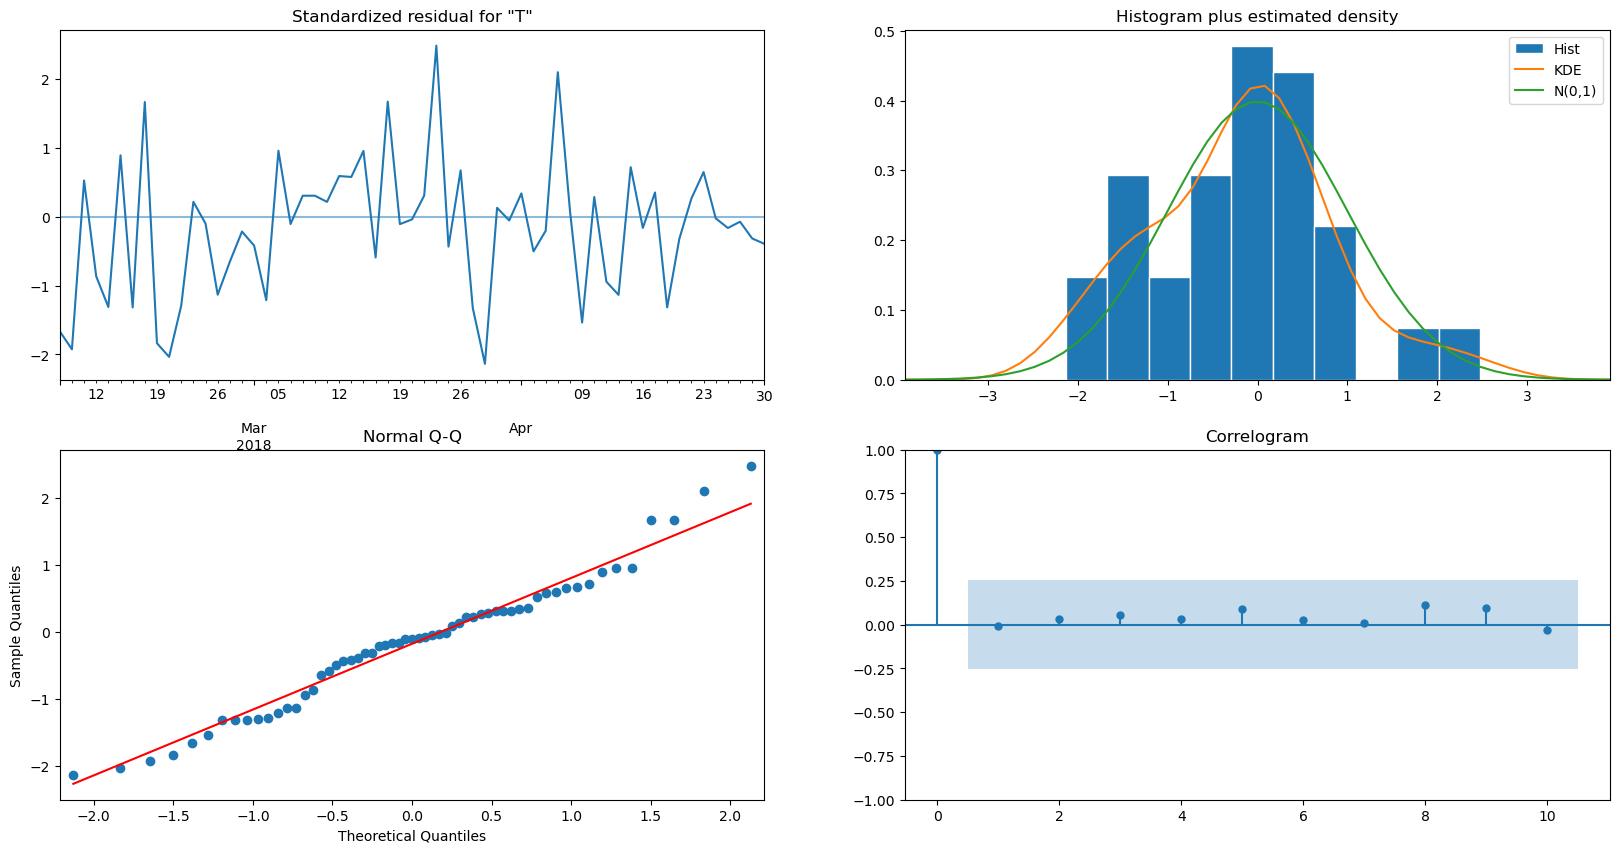

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = False 78.11


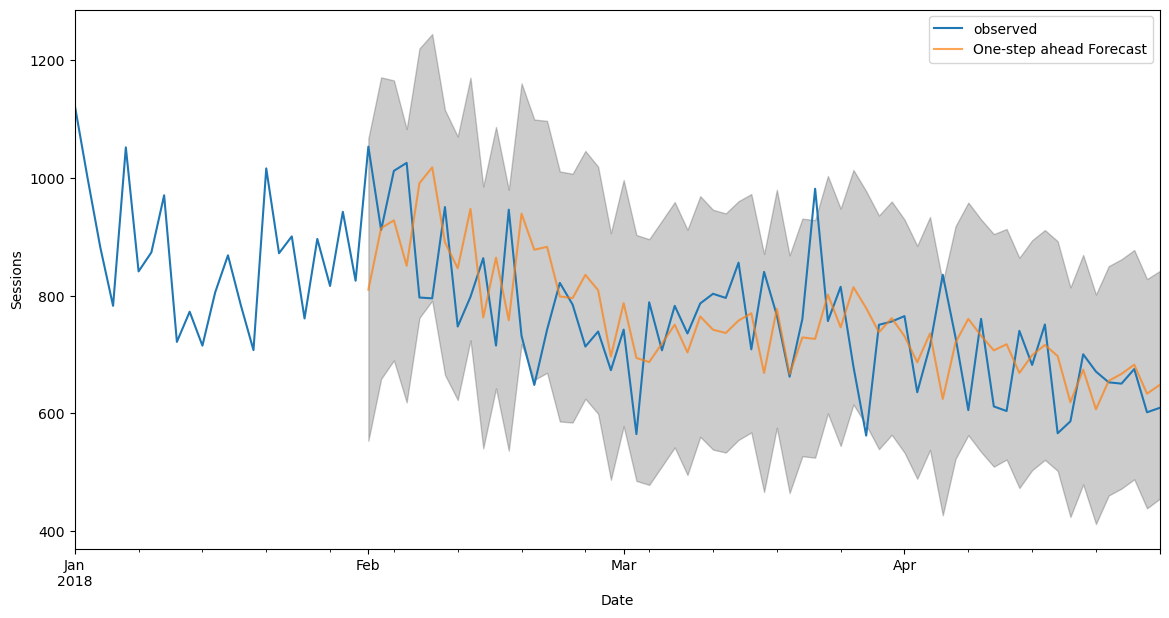

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = True 163.69


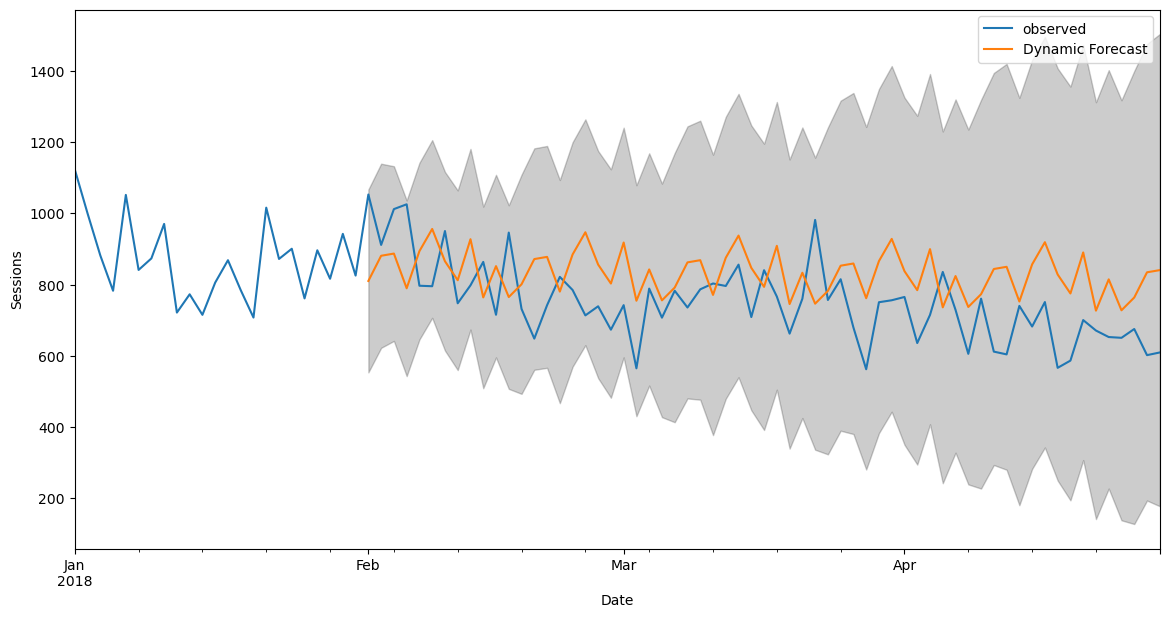

In [36]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(20, 10))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

model = sarima_eva(y,(0, 1, 1),(0, 1, 1, 12),12,'2018-02-01',y_to_val)


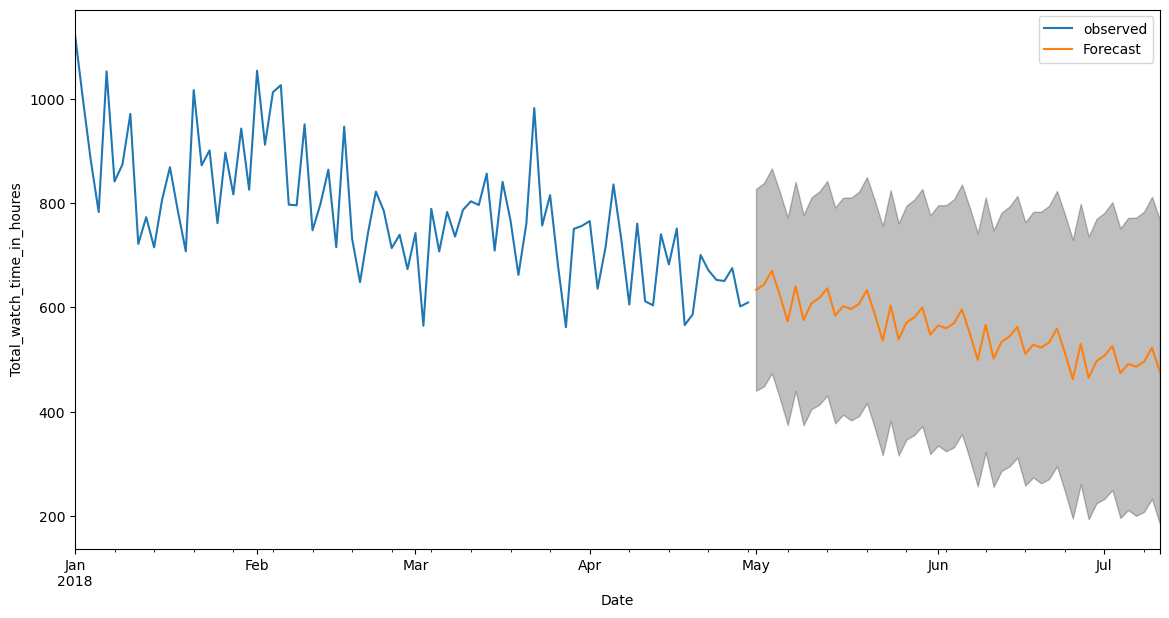

Date  Predicted_Mean  Lower Bound  Upper Bound
0 2018-05-01    633.70975215 440.32041740 827.09908691
1 2018-05-02    643.31962323 448.55282773 838.08641873
2 2018-05-03    669.94339232 473.81021592 866.07656872
3 2018-05-04    623.64076735 426.15066419 821.13087051
4 2018-05-07    573.21522268 374.37745261 772.05299275

In [37]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

final_table = forecast(model,52,y)
final_table.head()